# Walmart Data Analysis Project

### Dataset Overview -
<p> The sales data includes store number, date, weekly sales, holiday flag, temperature, fuel price,
CPI, and unemployment. Analyzing these factors can help in understanding sales dynamics and
formulating targeted strategies.

### Shape of Dataset

- **Rows (Observations):** Varies depending on cleaned version (initially 6435)
- **Columns:** 12

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### 2. Load the dataset

In [3]:
df = pd.read_csv('data/Walmart_sales_analysis.csv')
df.shape

(6435, 8)

In [4]:
df.columns


Index(['Store_Number', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', ' CPI ', 'Unemployment'],
      dtype='object')

In [5]:
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,"16,43,691",0,42.31,2.572,211,8.106
1,1,02-12-2010,"16,41,957",1,38.51,2.548,211,8.106
2,1,2/19/2010,"16,11,968",0,39.93,2.514,211,8.106
3,1,2/26/2010,"14,09,728",0,46.63,2.561,211,8.106
4,1,03-05-2010,"15,54,807",0,46.50,2.625,211,8.106


In [6]:
df.dtypes

Store_Number      int64
Date             object
Weekly_Sales     object
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
 CPI              int64
Unemployment    float64
dtype: object

In [7]:
df.describe()

,Store_Number,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.583994,7.999151
std,12.988182,0.255049,18.444933,0.459020,39.351305,1.875885
min,1.000000,0.000000,-2.060000,2.472000,126.000000,3.879000
25%,12.000000,0.000000,47.460000,2.933000,132.000000,6.891000
50%,23.000000,0.000000,62.670000,3.445000,183.000000,7.874000
75%,34.000000,0.000000,74.940000,3.735000,213.000000,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.000000,14.313000


### 3. Data Cleaning

<p> Checking for null values in the dataset

In [8]:
df.isnull().sum()

Store_Number    0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
 CPI            0
Unemployment    0
dtype: int64

<p> Removing the null values from the dataset (there is no null value in this case)

In [9]:
df.dropna()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,"16,43,691",0,42.31,2.572,211,8.106
1,1,02-12-2010,"16,41,957",1,38.51,2.548,211,8.106
2,1,2/19/2010,"16,11,968",0,39.93,2.514,211,8.106
3,1,2/26/2010,"14,09,728",0,46.63,2.561,211,8.106
4,1,03-05-2010,"15,54,807",0,46.50,2.625,211,8.106
...,...,...,...,...,...,...,...,...
6430,45,9/28/2012,"7,13,174",0,64.88,3.997,192,8.684
6431,45,10-05-2012,"7,33,455",0,64.89,3.985,192,8.667
6432,45,10-12-2012,"7,34,464",0,54.47,4.000,192,8.667
6433,45,10/19/2012,"7,18,126",0,56.47,3.969,192,8.667


Checking for duplicate data

In [10]:
df.duplicated().sum()

np.int64(0)

<p> Removing duplicate data (no duplicates in this case)

In [11]:
df.drop_duplicates()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,02-05-2010,"16,43,691",0,42.31,2.572,211,8.106
1,1,02-12-2010,"16,41,957",1,38.51,2.548,211,8.106
2,1,2/19/2010,"16,11,968",0,39.93,2.514,211,8.106
3,1,2/26/2010,"14,09,728",0,46.63,2.561,211,8.106
4,1,03-05-2010,"15,54,807",0,46.50,2.625,211,8.106
...,...,...,...,...,...,...,...,...
6430,45,9/28/2012,"7,13,174",0,64.88,3.997,192,8.684
6431,45,10-05-2012,"7,33,455",0,64.89,3.985,192,8.667
6432,45,10-12-2012,"7,34,464",0,54.47,4.000,192,8.667
6433,45,10/19/2012,"7,18,126",0,56.47,3.969,192,8.667


<p> Checking for any Wrong Store Number (No any)

In [12]:
(df['Store_Number'] < 1).sum()

np.int64(0)

### 4. Changing Data Types

Changing the data type of 'date' to datetime

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

<p> Changing the data type of weekly to int after removing the commas between them

In [14]:
df['Weekly_Sales'] = df['Weekly_Sales'].str.replace(',','').astype(int)

In [15]:
df.dtypes

Store_Number             int64
Date            datetime64[ns]
Weekly_Sales             int64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
 CPI                     int64
Unemployment           float64
dtype: object

## 5. Exploratory Data Analysis (EDA)

Average sales during holidays vs non-holidays

In [16]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean().round(2)

Holiday_Flag
0    1041256.38
1    1122887.89
Name: Weekly_Sales, dtype: float64

Correlation with economic indicators (Temperature, CPI, Fuel Price, Unemployment)

In [17]:
df.corr(numeric_only=True)['Weekly_Sales']

Store_Number   -0.335332
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
 CPI           -0.072496
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64

#### Sales Trend Overtime
- Total Weekly Sales Over Time

Plotting line graph for 'Total Weekly Sales Over Time' - Year vs. Weekly Sales graph

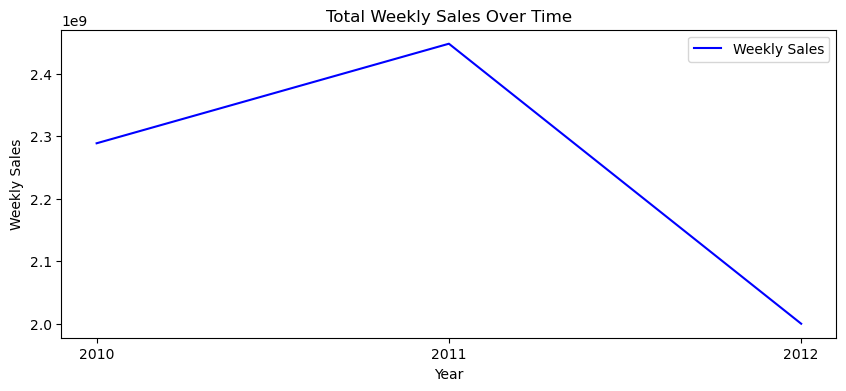

In [18]:
df['Year'] = df['Date'].dt.year
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()
ax = yearly_sales.plot(x='Year', y='Weekly_Sales',  color = 'blue', label = 'Weekly Sales',figsize=(10, 4))
ax.set_xticks(yearly_sales['Year'])
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Weekly Sales')
plt.show()

#### Store-wise Sales
- Total Sales Per Store

Plotting horizontal bar graph for 'Total Sales Per Store' - Weekly Sales vs. Store_Number graph

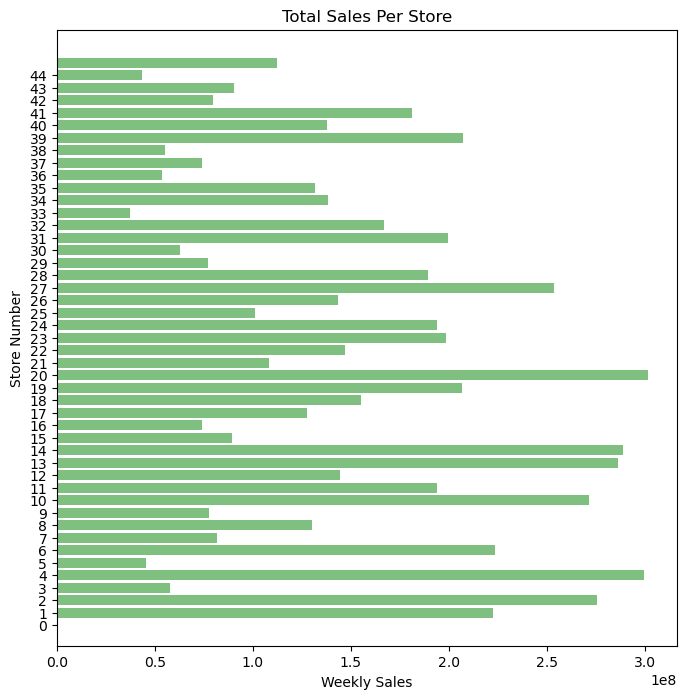

In [19]:
plt.figure(figsize=(8,8))
store_wise_sales = df.groupby('Store_Number')['Weekly_Sales'].sum().reset_index()
plt.barh(store_wise_sales['Store_Number'], store_wise_sales['Weekly_Sales'], color='green',alpha = 0.5)
plt.title('Total Sales Per Store')
plt.yticks(range(len(store_wise_sales['Store_Number'])))
plt.xlabel('Weekly Sales')
plt.ylabel('Store Number')
plt.show()


#### Holiday Impact
- Comparing Sales Between Holidays(1) and Non-Holidays(0)

Plotting pie chart to compare sales between holidays and non-holidays

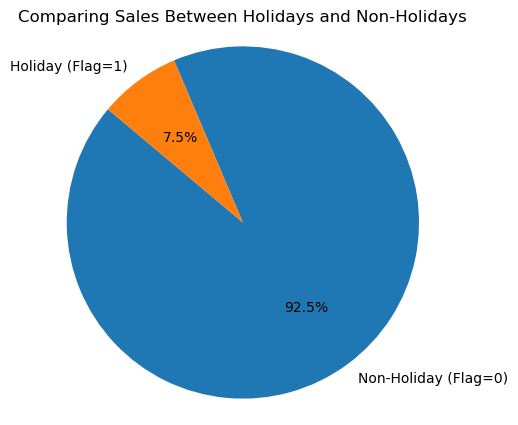

In [20]:
plt.figure(figsize=(5,5))
holiday_impact = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()
labels = ['Non-Holiday (Flag=0)', 'Holiday (Flag=1)']
plt.pie(holiday_impact, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Comparing Sales Between Holidays and Non-Holidays')
plt.axis('equal')
plt.show()

#### Reverting Back the Dataset to original arrangement before exporting
(i.e according to Index)

In [21]:
df.sort_index(inplace = True)

In [22]:
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
0,1,2010-02-05,1643691,0,42.31,2.572,211,8.106,2010
1,1,2010-02-12,1641957,1,38.51,2.548,211,8.106,2010
2,1,2010-02-19,1611968,0,39.93,2.514,211,8.106,2010
3,1,2010-02-26,1409728,0,46.63,2.561,211,8.106,2010
4,1,2010-03-05,1554807,0,46.50,2.625,211,8.106,2010


## 6. Exporting Data

In [23]:
df.to_csv('Cleaned_Walmart_Sales.csv', index = False)